In [1]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words =500)

In [3]:
# 훈련 세트와 검증 세트로 나누기
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2,
                                                 stratify = y_train, random_state = 5)

In [4]:
# 패딩
train_seq = pad_sequences(x_train, maxlen = 100)
val_seq = pad_sequences(x_val, maxlen =100)

In [6]:
# LSTM 모델 생성
model= keras.Sequential()
model.add(keras.layers.Embedding(500,16, input_length = 100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation ="sigmoid"))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 8809 (34.41 KB)
Trainable params: 8809 (34.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
rmsprop= keras.optimizers.RMSprop(learning_rate = 1e-4)
model.compile(optimizer = rmsprop, loss = "binary_crossentropy", metrics = ["accuracy"])

In [15]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("./model/best-lstm-model.h5",
                                                save_best_only =True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience =3, restore_best_weights = True)

In [16]:
history = model.fit(train_seq, y_train, epochs = 100, batch_size = 64,
                    validation_data = (val_seq, y_val),
                    callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 17s 45ms/step - loss: 0.6930 - accuracy: 0.5139 - val_loss: 0.6927 - val_accuracy: 0.5392
Epoch 2/100
  3/313 [..............................] - ETA: 12s - loss: 0.6931 - accuracy: 0.4948

C:\Users\양창우\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 13s 43ms/step - loss: 0.6923 - accuracy: 0.5507 - val_loss: 0.6917 - val_accuracy: 0.5728
Epoch 3/100
313/313 [==============================] - 14s 44ms/step - loss: 0.6909 - accuracy: 0.5798 - val_loss: 0.6897 - val_accuracy: 0.5854
Epoch 4/100
313/313 [==============================] - 13s 43ms/step - loss: 0.6881 - accuracy: 0.5962 - val_loss: 0.6855 - val_accuracy: 0.6036
Epoch 5/100
313/313 [==============================] - 14s 44ms/step - loss: 0.6809 - accuracy: 0.6162 - val_loss: 0.6737 - val_accuracy: 0.6358
Epoch 6/100
313/313 [==============================] - 14s 44ms/step - loss: 0.6523 - accuracy: 0.6801 - val_loss: 0.6272 - val_accuracy: 0.7076
Epoch 7/100
313/313 [==============================] - 14s 44ms/step - loss: 0.6080 - accuracy: 0.7189 - val_loss: 0.5961 - val_accuracy: 0.7246
Epoch 8/100
313/313 [==============================] - 14s 43ms/step - loss: 0.5819 - accuracy: 0.7369 - val_loss: 0.5732 - val_accuracy: 0.73

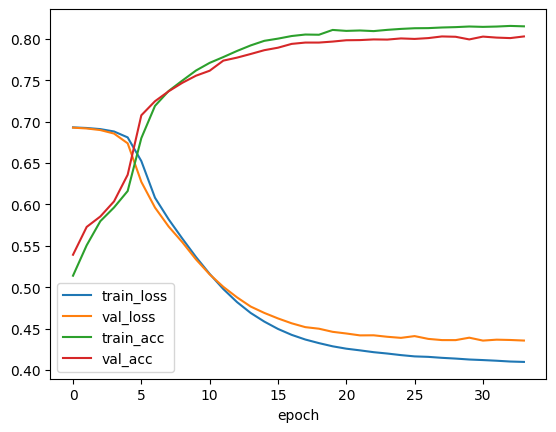

In [18]:
plt.figure()

plt.plot(history.history["loss"], label = "train_loss")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.plot(history.history["accuracy"], label = "train_acc")
plt.plot(history.history["val_accuracy"], label = "val_acc")

plt.xlabel("epoch")
plt.legend()
plt.show()

# 순환층에 드롭아웃 적용

- 순환층은 자체적으로 드롭아웃 기능을 제공
    - SimpleRNN과  LSTM 클래스 모두 dropout 매개변수 recurrent_dropout 매개변수를 가지고 있음
        - dropout : 셀의 입력에 드롭아웃을 적용
        - recurrent_dropout : 순환되는 은닉 상태에 드롭아웃을 적용
            - 버전에 따라 recurrent_dropout이 GPU를 사용하지 못하는 경우가 많음

In [19]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length = 100))
model2.add(keras.layers.LSTM((8), dropout = 0.3))
model2.add(keras.layers.Dense(1, activation = "sigmoid"))


In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 8809 (34.41 KB)
Trainable params: 8809 (34.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model2.compile(optimizer = rmsprop, loss = "binary_crossentropy",
              metrics = ["accuracy"])

In [22]:
check_point_cb = keras.callbacks.ModelCheckpoint("./model/best-dropout-model.h5",
                                                save_best_only = True)
ealy_stopping_cb = keras.callbacks.EarlyStopping(patience =3,
                                                restore_best_weights = True)

In [23]:
history = model.fit(train_seq, y_train, epochs = 100, batch_size = 64,
                   validation_data =(val_seq, y_val),
                   callbacks = [check_point_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 7s 22ms/step - loss: 0.4111 - accuracy: 0.8140 - val_loss: 0.4372 - val_accuracy: 0.8008
Epoch 2/100
313/313 [==============================] - 7s 23ms/step - loss: 0.4104 - accuracy: 0.8147 - val_loss: 0.4370 - val_accuracy: 0.8002
Epoch 3/100
313/313 [==============================] - 7s 23ms/step - loss: 0.4097 - accuracy: 0.8159 - val_loss: 0.4336 - val_accuracy: 0.8014
Epoch 4/100
313/313 [==============================] - 7s 23ms/step - loss: 0.4093 - accuracy: 0.8152 - val_loss: 0.4342 - val_accuracy: 0.8014
Epoch 5/100
313/313 [==============================] - 7s 23ms/step - loss: 0.4086 - accuracy: 0.8163 - val_loss: 0.4328 - val_accuracy: 0.8042
Epoch 6/100
313/313 [==============================] - 7s 23ms/step - loss: 0.4080 - accuracy: 0.8169 - val_loss: 0.4346 - val_accuracy: 0.7992
Epoch 7/100
313/313 [==============================] - 8s 24ms/step - loss: 0.4077 - accuracy: 0.8170 - val_loss: 0.4336 - val_accuracy:

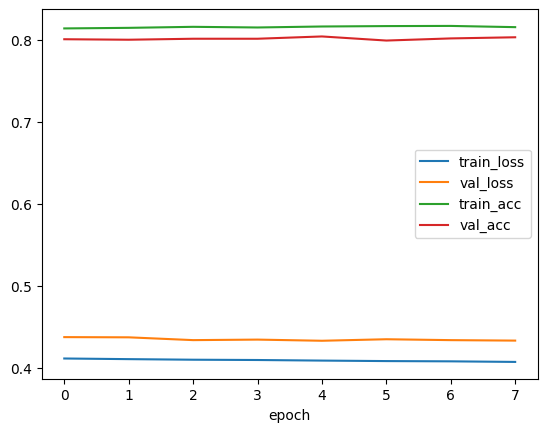

In [26]:
plt.figure()

plt.plot(history.history["loss"], label = "train_loss")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.plot(history.history["accuracy"], label = "train_acc")
plt.plot(history.history["val_accuracy"], label = "val_acc")

plt.xlabel("epoch")
plt.legend()
plt.show()

# 2개의 층을 연결

- 순환층을 연결할 때 주의점
    - 순환층의 은닉 상태는 샘플의 마지막 타임스텝에 대한 은닉 상태만 다음 층으로 전달
        - 순환층을 쌓게 되면 모든 순환층에 순차 데이터가 필요함
            - return_sequences 매개변수를 True로 지정
            

In [27]:
model3 = keras.Sequential()
model3.add(keras.layers.Embedding(500, 16,input_length = 100))
model3.add(keras.layers.LSTM(8, dropout = 0.3, return_sequences = True))
model3.add(keras.layers.LSTM(8, dropout = 0.3))
model3.add(keras.layers.Dense(1, activation = "sigmoid"))

In [28]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_2 (LSTM)               (None, 100, 8)            800       
                                                                 
 lstm_3 (LSTM)               (None, 8)                 544       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9353 (36.54 KB)
Trainable params: 9353 (36.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
rmsprop  = keras.optimizers.RMSprop(learning_rate = 1e-4)
model3.compile(optimizer = rmsprop, loss = "binary_crossentropy", metrics = ["accuracy"])


In [30]:
check_point_cb = keras.callbacks.ModelCheckpoint("./model/best-2rnn-model.h5",
                                                save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights = True)

In [31]:
history = model.fit(train_seq, y_train, epochs = 100, batch_size = 64,
                   validation_data = (val_seq, y_val),
                   callbacks = [check_point_cb, early_stopping_cb])


Epoch 1/100
313/313 [==============================] - 7s 23ms/step - loss: 0.4080 - accuracy: 0.8144 - val_loss: 0.4342 - val_accuracy: 0.8008
Epoch 2/100
313/313 [==============================] - 7s 22ms/step - loss: 0.4070 - accuracy: 0.8162 - val_loss: 0.4357 - val_accuracy: 0.8036
Epoch 3/100
313/313 [==============================] - 7s 24ms/step - loss: 0.4069 - accuracy: 0.8163 - val_loss: 0.4311 - val_accuracy: 0.8024
Epoch 4/100
313/313 [==============================] - 7s 23ms/step - loss: 0.4064 - accuracy: 0.8165 - val_loss: 0.4325 - val_accuracy: 0.8014
Epoch 5/100
313/313 [==============================] - 7s 23ms/step - loss: 0.4058 - accuracy: 0.8171 - val_loss: 0.4363 - val_accuracy: 0.8026
Epoch 6/100
313/313 [==============================] - 7s 23ms/step - loss: 0.4053 - accuracy: 0.8177 - val_loss: 0.4302 - val_accuracy: 0.8034
Epoch 7/100
313/313 [==============================] - 8s 24ms/step - loss: 0.4050 - accuracy: 0.8180 - val_loss: 0.4296 - val_accuracy:

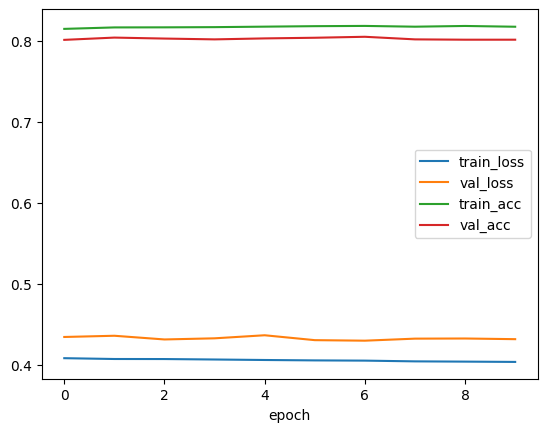

In [32]:
plt.figure()

plt.plot(history.history["loss"], label = "train_loss")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.plot(history.history["accuracy"], label = "train_acc")
plt.plot(history.history["val_accuracy"], label = "val_acc")

plt.xlabel("epoch")
plt.legend()
plt.show()

In [33]:
model4 = keras.Sequential()
model4.add(keras.layers.Embedding(500,16, input_length = 100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation ="sigmoid"))

In [34]:
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 16)           8000      
                                                                 
 gru (GRU)                   (None, 8)                 624       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8633 (33.72 KB)
Trainable params: 8633 (33.72 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [35]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model4.compile(optimizer = rmsprop, loss = "binary_crossentropy", metrics = ["accuracy"])
checkpoint_cb = keras.callbacks.ModelCheckpoint("./model/best-gru-model.h5",
                                               save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3,
                                                  restore_best_weights = True)

In [36]:
history = model4.fit(train_seq, y_train, epochs = 100, batch_size = 64,
                    validation_data = (val_seq, y_val),
                    callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 10s 25ms/step - loss: 0.6927 - accuracy: 0.5114 - val_loss: 0.6918 - val_accuracy: 0.5444
Epoch 2/100
313/313 [==============================] - 8s 24ms/step - loss: 0.6909 - accuracy: 0.5610 - val_loss: 0.6896 - val_accuracy: 0.5730
Epoch 3/100
313/313 [==============================] - 8s 24ms/step - loss: 0.6881 - accuracy: 0.5842 - val_loss: 0.6860 - val_accuracy: 0.5964
Epoch 4/100
313/313 [==============================] - 8s 24ms/step - loss: 0.6834 - accuracy: 0.6015 - val_loss: 0.6799 - val_accuracy: 0.6102
Epoch 5/100
313/313 [==============================] - 8s 25ms/step - loss: 0.6752 - accuracy: 0.6194 - val_loss: 0.6692 - val_accuracy: 0.6328
Epoch 6/100
313/313 [==============================] - 8s 25ms/step - loss: 0.6609 - accuracy: 0.6380 - val_loss: 0.6503 - val_accuracy: 0.6536
Epoch 7/100
313/313 [==============================] - 8s 25ms/step - loss: 0.6339 - accuracy: 0.6658 - val_loss: 0.6137 - val_accuracy

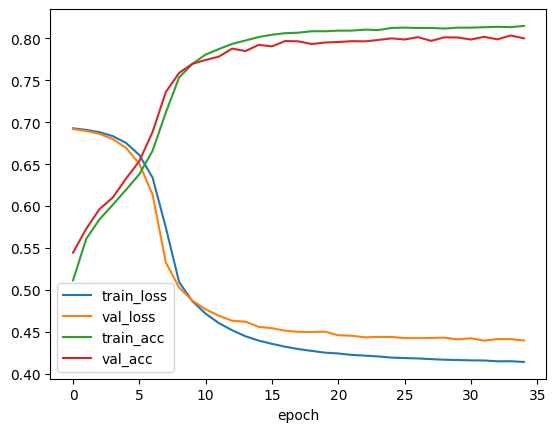

In [37]:
plt.figure()

plt.plot(history.history["loss"], label = "train_loss")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.plot(history.history["accuracy"], label = "train_acc")
plt.plot(history.history["val_accuracy"], label = "val_acc")

plt.xlabel("epoch")
plt.legend()
plt.show()

In [42]:
test_seq = pad_sequences(x_test, maxlen = 100)

In [47]:
y_test

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [44]:
rnn_model = keras.models.load_model("C:/DL/model/best-cnn-model.h5")

In [45]:
rnn_model.evaluate(test_seq, y_test)

ValueError: in user code:

    File "C:\Users\양창우\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 2042, in test_function  *
        return step_function(self, iterator)
    File "C:\Users\양창우\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 2025, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\양창우\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 2013, in run_step  **
        outputs = model.test_step(data)
    File "C:\Users\양창우\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 1893, in test_step
        y_pred = self(x, training=False)
    File "C:\Users\양창우\AppData\Roaming\Python\Python311\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\양창우\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 28, 28, 1), found shape=(None, 100)
